## Step 1: Reading and Understanding the data

Importing Numpy and Pandas and read the Bike Sharing day dataset


In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data from CSV file
bikeShare = pd.read_csv("day.csv")
#viewing the data sample with head
bikeShare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikeShare.shape

(730, 16)

In [4]:
# looking at the information of the columns
bikeShare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# describe the columns of the data frame
bikeShare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Renaming columns for better understanding
bikeShare.rename(columns = {'yr':'year',
                            'mnth':'month',
                            'atemp':'ftemp',
                            'hum':'humidity',
                            'cnt':'count'}, inplace = True)

In [7]:
# creating a copy of the data frame
bikeshare_copy = bikeShare.copy()

In [8]:
# dropping the duplicates
bikeshare_copy.drop_duplicates(inplace=True)
bikeshare_copy.shape

(730, 16)

As the shape is same after dropping duplicates operation, that means there are no duplicates in the dataframe

In [9]:
# dropping unwanted columns
# instant has only index for the row
# Removing the date variable as we already have month, workday and year variable variable which can compansate instead of date
# As our only concern is the total count of bike hence I will develop my model considering total count as my target variable 
# and I will remove the registered user count variable and casual user Count from my dataset for model preparation
bikeShare.drop(['instant','dteday','dteday','casual','registered'],axis=1,inplace=True)

In [10]:
# Encoding/mapping the season column according to data dictionary
bikeShare.season = bikeShare.season.map({1:'spring', 
                                  2:'summer', 
                                  3:'fall', 
                                  4:'winter'})

In [11]:
# Encoding/mapping the month column
bikeShare.month = bikeShare.month.map({1:'jan',2:'feb',3:'mar',4:'apr',
                                5:'may',6:'june',7:'july',8:'aug',
                                9:'sep',10:'oct',11:'nov',12:'dec'})

In [12]:
# Encoding/mapping the weekday column

bikeShare.weekday = bikeShare.weekday.map({0:'sun',1:'mon',2:'tue',
                                    3:'wed',4:'thu',5:'fri',
                                    6:'sat'})

### To better visualize the weathersit variable we can categorize it as follows

+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
        # we can visualise this as - Clear or cloudy
        
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        # we can visualise this as - Misty
        
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        # this can be visualised as - Light precipitation
        
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        # we can visualise this as - Heavy precipitation

In [13]:
# Encoding/mapping the weathersit column

bikeShare.weathersit = bikeShare.weathersit.map({1:'Clear_cloudy',2:'Misty',
                                   3:'Light_precipitation',
                                   4:'Heavy_precipitation'})


In [14]:
# check the dataset using head

bikeShare.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,ftemp,humidity,windspeed,count
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear_cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
#Checking the column info again
bikeShare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   ftemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Visualising the Data

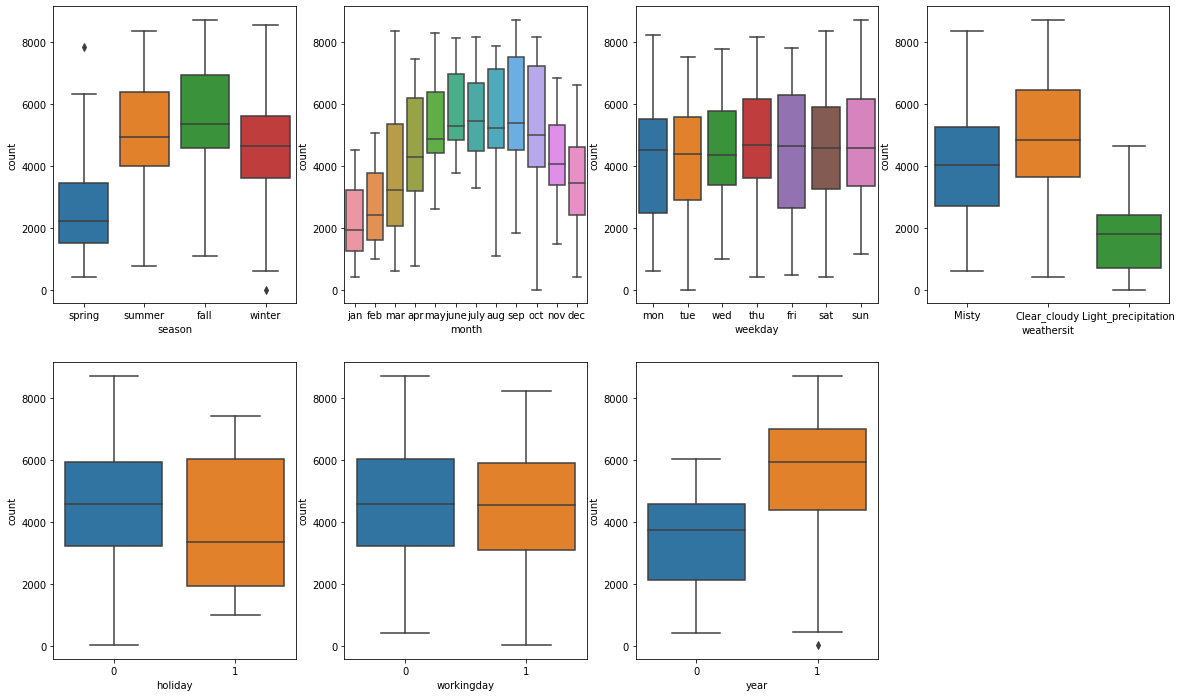

In [16]:
#Analysing and visualising the categorical variable to see how they stand against the target variable
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = bikeShare)

plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'count', data = bikeShare)

plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'count', data = bikeShare)

plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'count', data = bikeShare)

plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'count', data = bikeShare)

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = bikeShare)

plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'count', data = bikeShare)
plt.show()

#### Assumptions from the visualization
1. From the first plot we can see that the count is high in the summer and fall
2. It also varies a lot less when there is precipitation as people opt to not use bikes when the roads are wet
2. We can also see that the count has varied a lot in 2019 as compared to 2018 which shows a increasing trend for share bikes
3. From plot 1,2 and 4 we can assume that the bike sharing count may go higher in the months when there is no precipitation
4. we can also see that the count varies a lot on working days

In [17]:
# now we will create Barplots to compare the counts with respective to years 2018 and 2019
# so we are creating a function to create barplot related to categorical vars

def barplot_cat_variables(column):
    plt.figure(figsize = (16,8))
    plt.subplot(1,2,1)
    sns.barplot(column,'count',data = bikeShare)
    plt.subplot(1,2,2)
    sns.barplot(column,'count',data = bikeShare, hue='year',palette='Set1')
    plt.legend(labels=['2018','2019'])
    plt.show()

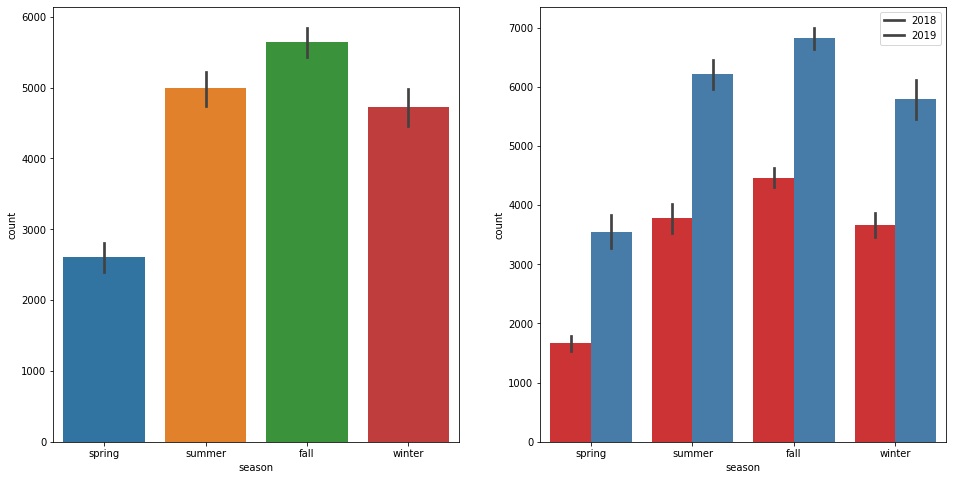

In [18]:
# Barplot for season variable
barplot_cat_variables('season')

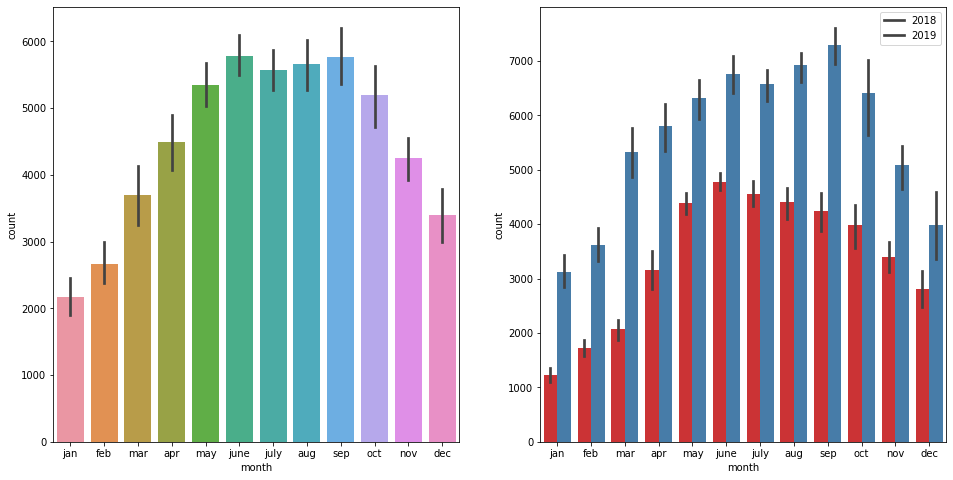

In [19]:
# Barplot for month variable
barplot_cat_variables('month')

As we infered from box plot, the most bookings for bike sharing have been done during the month of may, june, aug, sep and oct which also coincide with months of summer and fall. Hence we can conclude that most bookings happen in days when there is little or no precipitation and the bookings again go down for winter and rainy seasons as the year ends. Number of booking for each month seems to have increased from 2018 to 2019

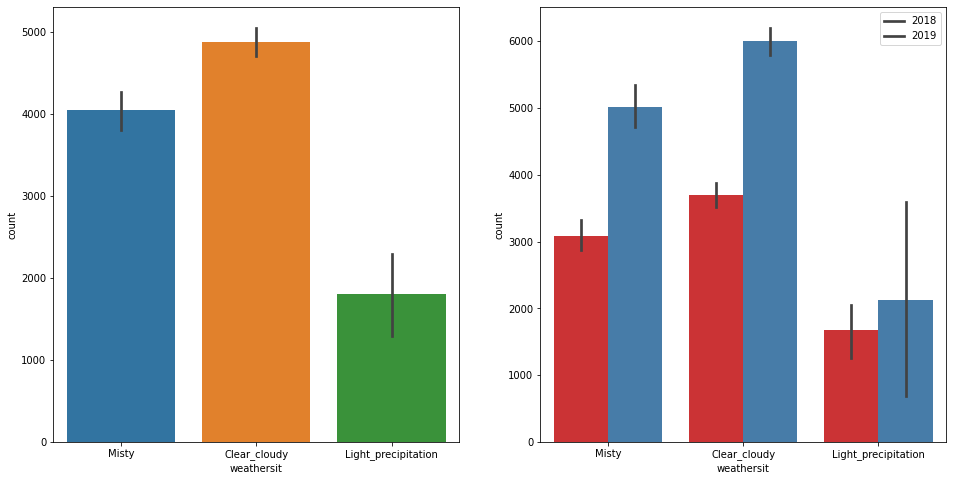

In [20]:
# Barplot for weathersit variable
barplot_cat_variables('weathersit')

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

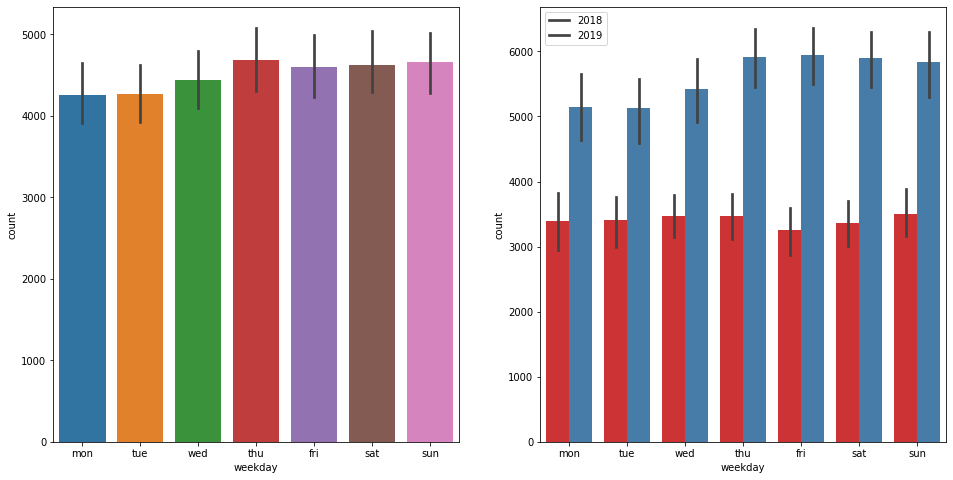

In [21]:
# Barplot for weekday variable
barplot_cat_variables('weekday')

Start of the week seems to attract lesser booking as compared to other days of the week.

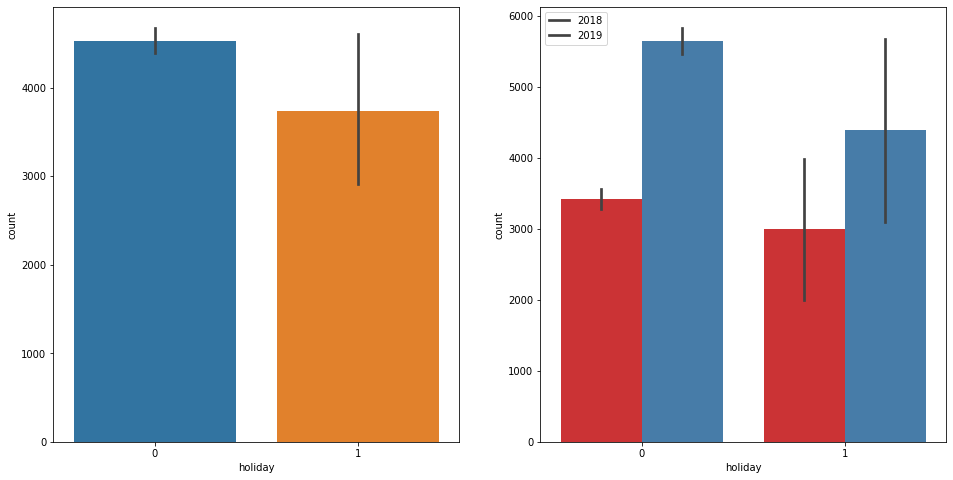

In [22]:
# Barplot for holiday variable
barplot_cat_variables('holiday')

This shows that bookings get lower on holidays as compared to workdays as people may want to spend time at home.

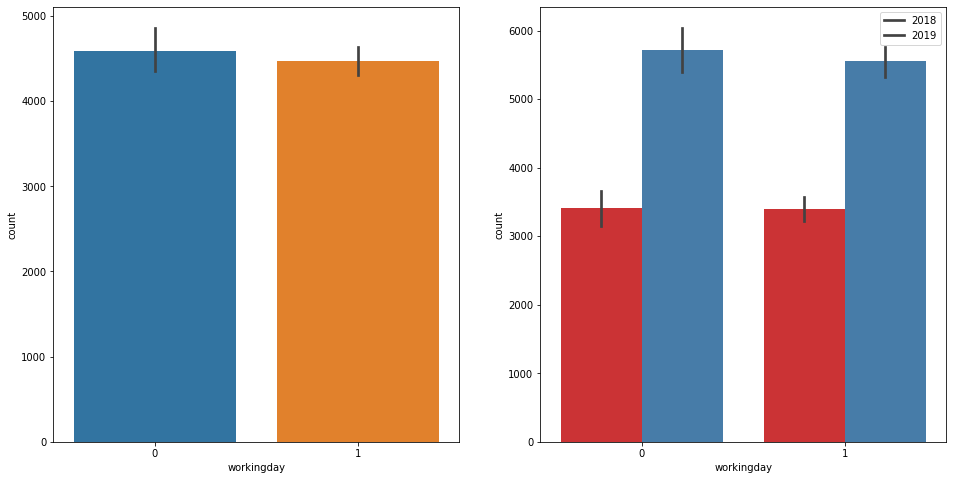

In [23]:
# Barplot for workingday variable
barplot_cat_variables('workingday')

Bookings on working and non-working days show no defference but the count increased the following year

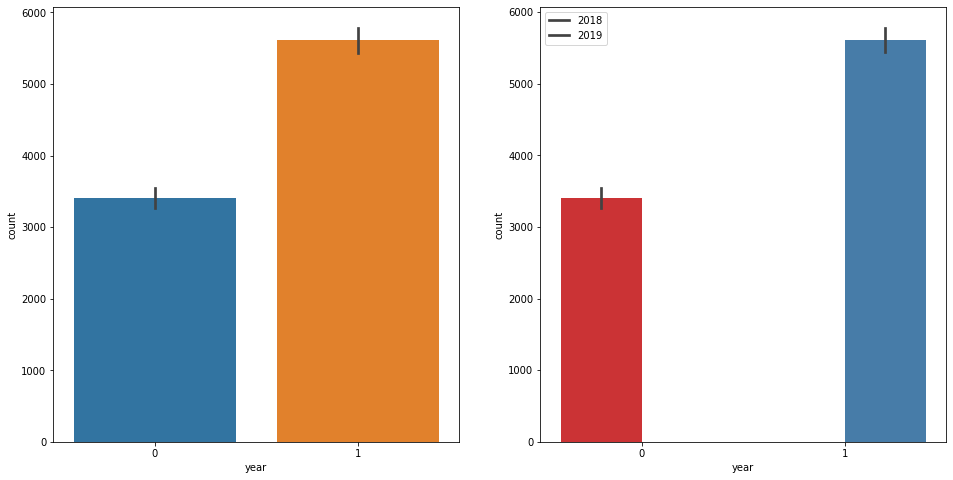

In [24]:
# Barplot for year variable
barplot_cat_variables('year')

Bookings have increased in 2019 as compared to 2018 which shows good progress in terms of business for bikesharing.

#### Analysing / visualising the numerical variables

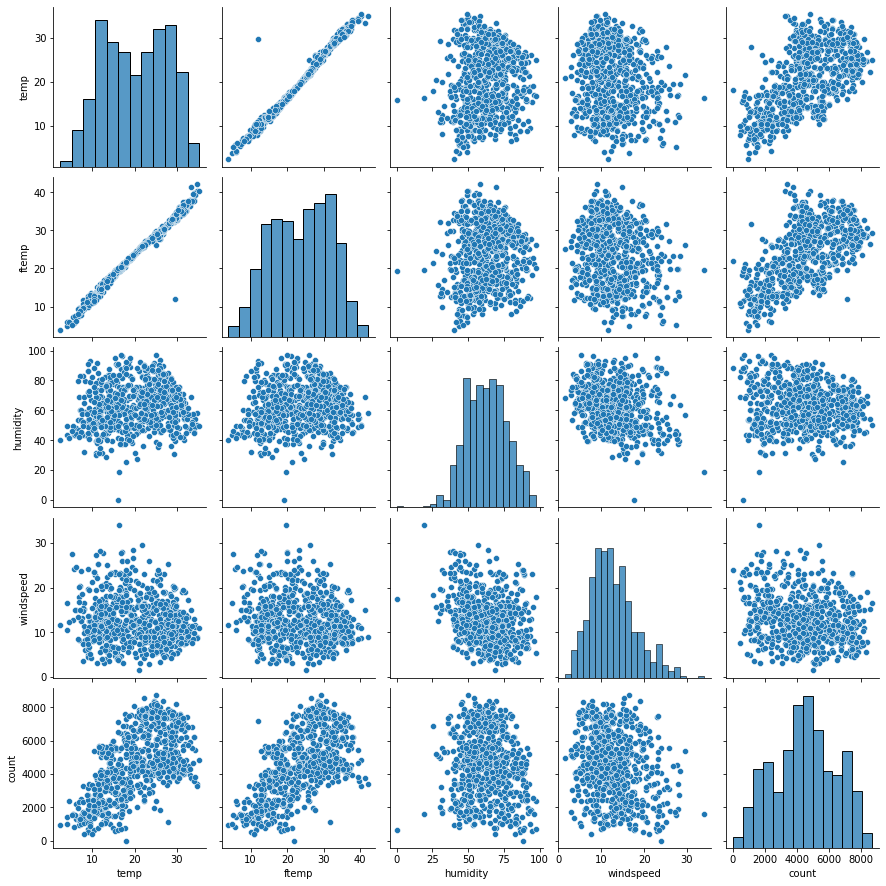

In [25]:
sns.pairplot(data=bikeShare, vars=['temp','ftemp','humidity','windspeed','count'])
plt.show()

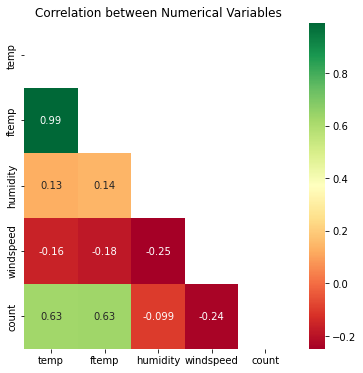

In [26]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bikeShare[['temp','ftemp','humidity','windspeed','count']].corr())
sns.heatmap(bikeShare[['temp','ftemp','humidity','windspeed','count']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

The temp and ftemp could give rise to multicolinearity and there seems to be a linear relationship between them. Hence we will have to remove one of them based on VIF and P-value with respect to other variables

### Step 2 : Preparing the Data for Modeling

- Encoding : 
    - Converting binary vars to 1/0
    - Other categorical vars to dummy vars


In [27]:
# creating dummy variables for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bikeShare.month,drop_first=True)
weekdays_df=pd.get_dummies(bikeShare.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bikeShare.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bikeShare.season,drop_first=True)

In [28]:
bikeShare.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,ftemp,humidity,windspeed,count
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear_cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
# Merging  the dataframe, with the dummy variabls
bikeshare_new = pd.concat([bikeShare,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [30]:
# Removing unnecessary variables now
bikeshare_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [31]:
bikeshare_new.head()

,year,holiday,workingday,temp,ftemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_precipitation,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
bikeshare_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   ftemp                730 non-null    float64
 5   humidity             730 non-null    float64
 6   windspeed            730 non-null    float64
 7   count                730 non-null    int64  
 8   aug                  730 non-null    uint8  
 9   dec                  730 non-null    uint8  
 10  feb                  730 non-null    uint8  
 11  jan                  730 non-null    uint8  
 12  july                 730 non-null    uint8  
 13  june                 730 non-null    uint8  
 14  mar                  730 non-null    uint8  
 15  may                  730 non-null    uin

In [33]:
# The shape of data frame
bikeshare_new.shape

(730, 30)

### Step 3 : Split the Data into Train and Test Sets

In [34]:
# splitting the dataframe into Train and Test
np.random.seed(0)
df_train, df_test = train_test_split(bikeshare_new, train_size = 0.7, random_state = 100)

In [35]:
df_train.shape

(510, 30)

In [36]:
df_test.shape

(220, 30)

In [37]:
# Rescaling the features using MinMaxScaler
scaler = MinMaxScaler()

In [38]:
# verifying the head of dataset before scaling
df_train.head()

,year,holiday,workingday,temp,ftemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_precipitation,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,1,0,0,0,0,1,0,1,0


In [39]:
# applying scaler() to all numerical variables 
num_vars = ['temp','ftemp','humidity','windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [40]:
# veryfying the head after applying scaling
df_train.head()

,year,holiday,workingday,temp,ftemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_precipitation,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,0,1,0,1,0


In [41]:
df_train.describe()

,year,holiday,workingday,temp,ftemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_precipitation,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


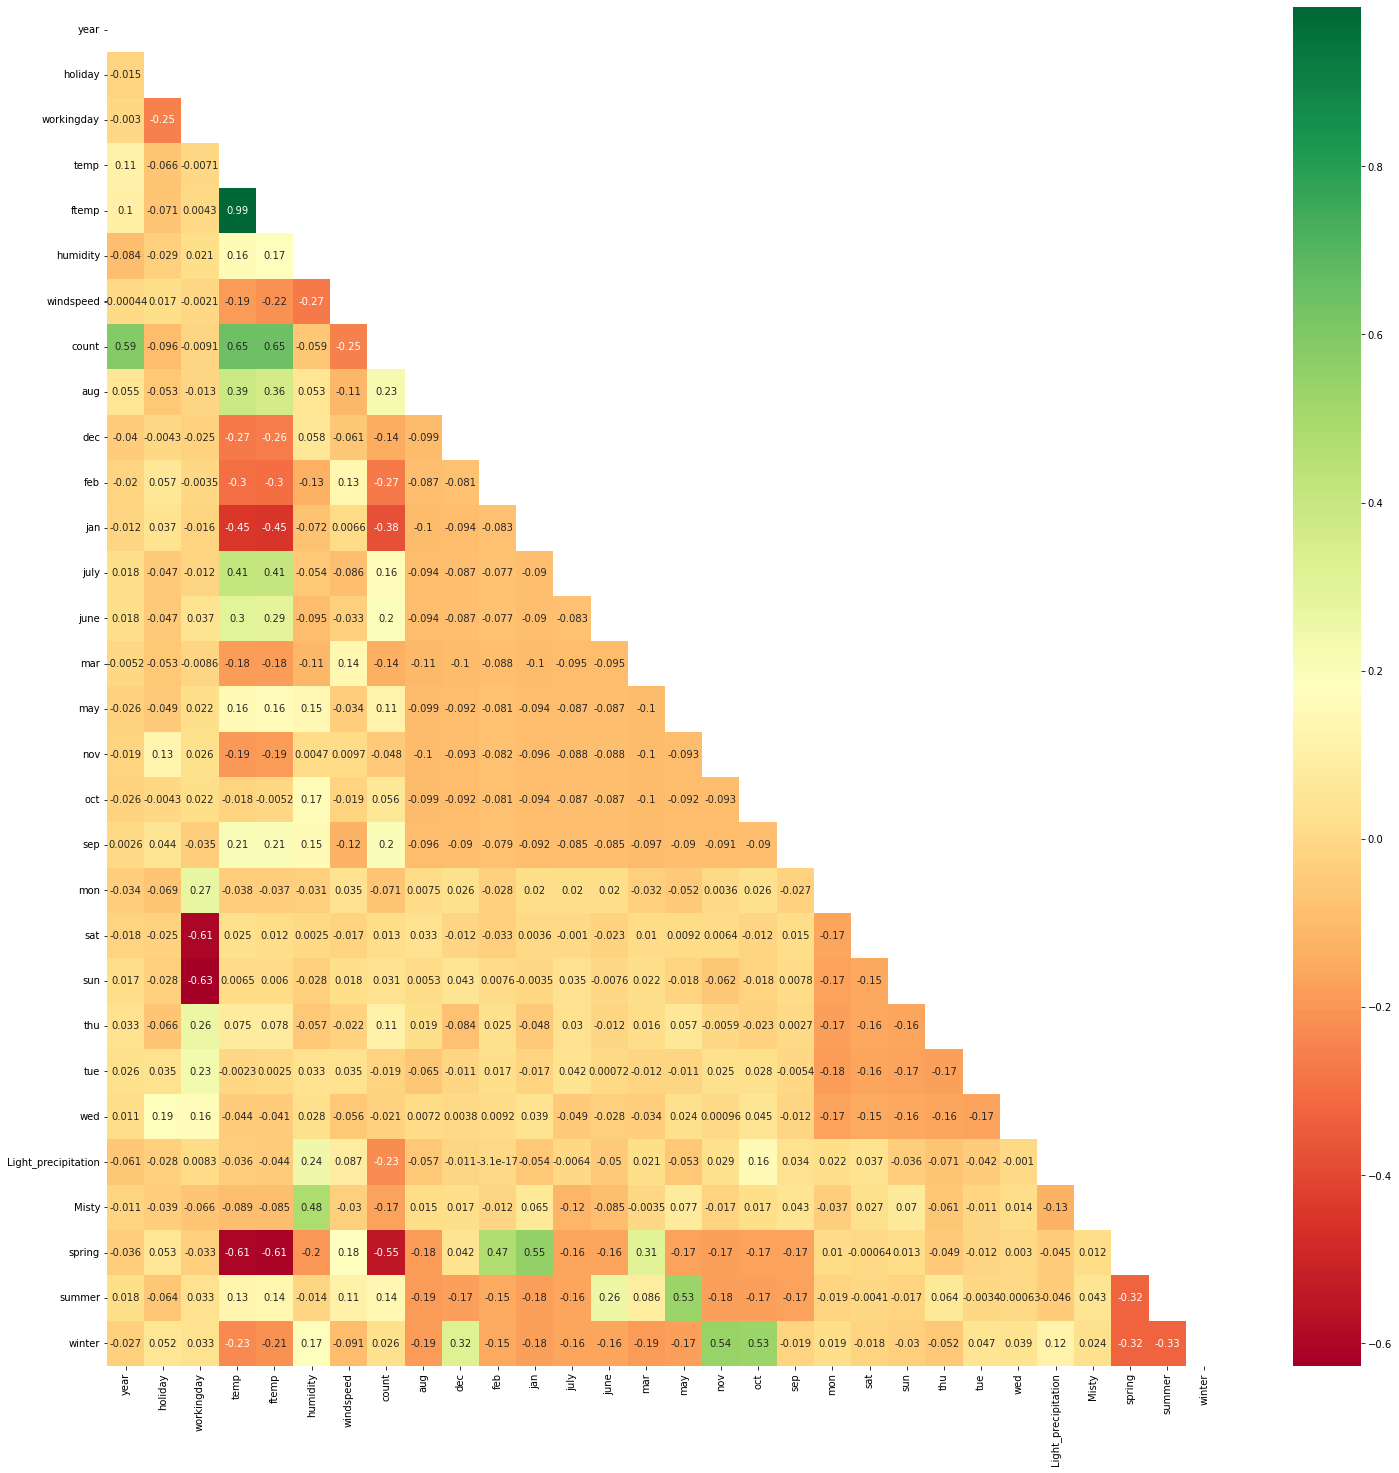

In [42]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

Count shows to have correlation with temp and year variables. 
Misty and humidity show correlation. 
Spring season with Jan and Feb month.
Summer season with may month.
Winter season with oct and nov month show good correlation.

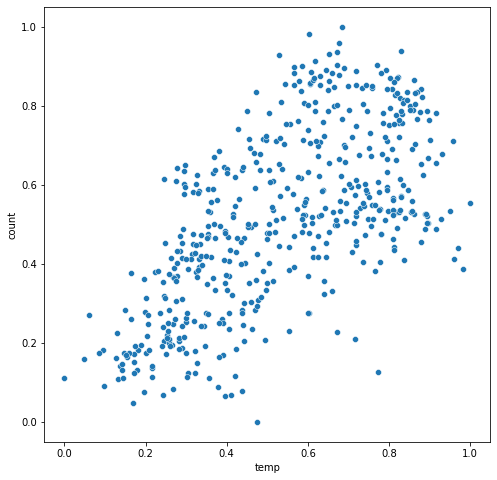

In [43]:
# Visualizing temp and count variable as scatterplot
plt.figure(figsize = (8,8))
sns.scatterplot(data=df_train, x="temp", y="count")
plt.show()

The plot shows a positive correlation between temp and count

#### Building Linear model

In [44]:
y_train = df_train.pop('count')
X_train = df_train

In [45]:
# Recursive feature elimination, we will select the top 15 features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [46]:
#List of variables selected in the list of top 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('ftemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light_precipitation', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [47]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)
#Storing dataframe with RFE selected variables
X_train_rfe = X_train[col]

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'Light_precipitation', 'Misty', 'spring',
       'summer', 'winter'],
      dtype='object')


In [48]:
# the rejected columns are 
X_train.columns[~rfe.support_]

Index(['workingday', 'ftemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [49]:
# creating a function to calculate VIF of variables
def calculate_VIF(dataframe):
    vif = pd.DataFrame()
    vif['Variables'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [50]:
# calculate VIF

calculate_VIF(X_train_rfe)

,Variables,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Misty,2.32
0,year,2.09
8,nov,1.85
6,jan,1.75


Humidity shows high VIF value

### Step 4 : Building a linear model

In [51]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_m1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_m1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          8.15e-189
Time:                        01:02:44   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3197    

In [52]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_VIF(X_train_new)

,Variables,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,year,2.07
7,nov,1.81
5,jan,1.66
6,july,1.59
10,Misty,1.57


In [53]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_m2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          4.75e-186
Time:                        01:02:45   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2450    

In [54]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_VIF(X_train_new)

,Variables,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.24
0,year,2.07
12,winter,2.05
5,jan,1.65
6,july,1.59
9,Misty,1.57
7,sep,1.34


In [55]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_m3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          2.74e-186
Time:                        01:02:45   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2283    

In [56]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_VIF(X_train_new)

,Variables,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,year,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,Misty,1.56
6,sep,1.34


In [57]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_m4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_m4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          8.14e-187
Time:                        01:02:46   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2154    

In [58]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_VIF(X_train_new)

,Variables,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,year,2.07
10,winter,1.78
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_precipitation,1.08


In [59]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_m5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_m5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          5.06e-187
Time:                        01:02:46   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1994    

In [60]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_VIF(X_train_new)

,Variables,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_precipitation,1.08
1,holiday,1.04


In [61]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_m6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_m6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          1.47e-186
Time:                        01:02:47   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1909    

##### We will cosider the above model lr_m6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors project to be significant. 

##### F-Statistics value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant

In [62]:
# Lets check the coefficient values for the parameters
lr_m6.params

const                  0.190855
year                   0.234132
holiday               -0.096316
temp                   0.477737
windspeed             -0.148098
sep                    0.090998
Light_precipitation   -0.285031
Misty                 -0.078741
spring                -0.055406
summer                 0.062076
winter                 0.094476
dtype: float64

#### Residual analysis of the train data and validation

In [63]:
X_train_lm_6

,const,year,holiday,temp,windspeed,sep,Light_precipitation,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


In [64]:
y_train_pred = lr_m6.predict(X_train_lm_6)

##### Checking the normality of errors

Text(0.5, 0, 'Errors')

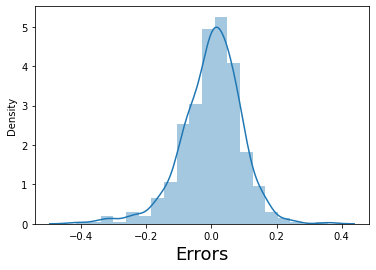

In [65]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
plt.xlabel('Errors', fontsize = 18)

We see that the error terms are following the normal distribution

##### Checking for multi colinearity

In [66]:
calculate_VIF(X_train_new)

,Variables,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_precipitation,1.08
1,holiday,1.04


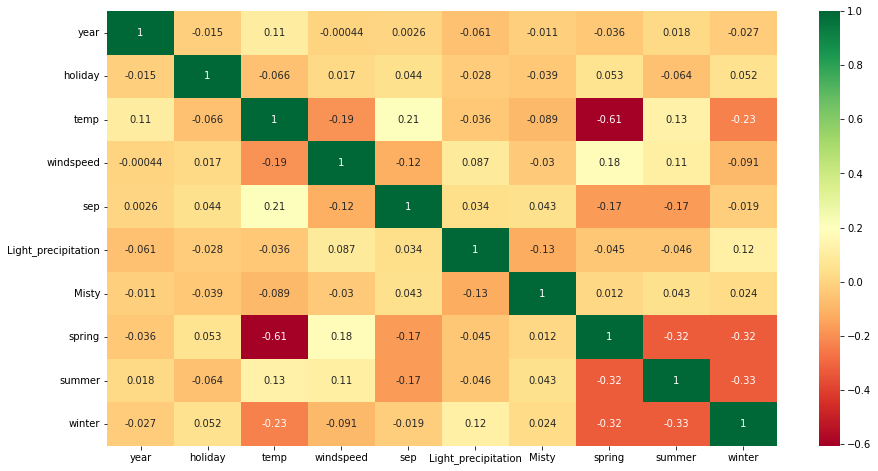

In [67]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

The vif values are all less than 5 and also there is no visible multicolinearity as seen from the heatmap

##### Verifying Linearity 

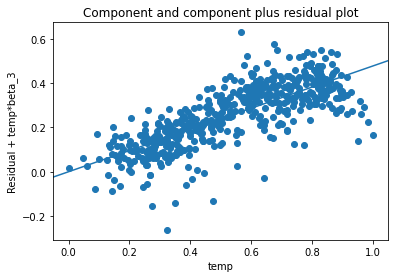

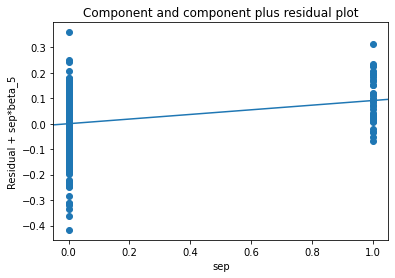

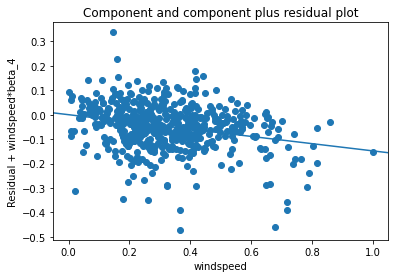

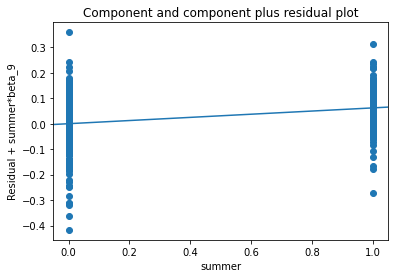

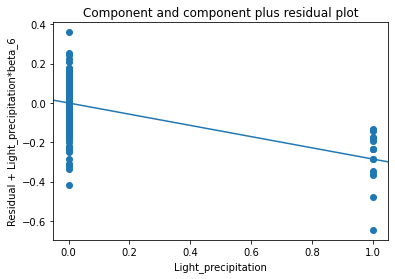

In [68]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_m6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_m6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_m6, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lr_m6, 'summer')
plt.show()

sm.graphics.plot_ccpr(lr_m6, 'Light_precipitation')
plt.show()

Linearity can be observed from above visualisation

##### Checking for Homoscedasticity

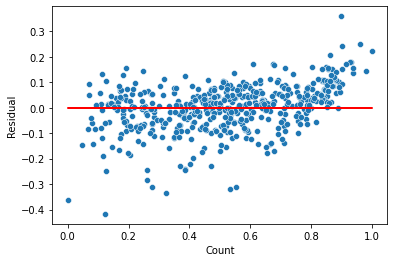

In [69]:
y_train_pred = lr_m6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.
###### Independance of residuals by Durbin-Watson
Durbin-Watson value of final model lr_m5 is 2.085, which signifies there is non to very minimal autocorrelation

#### Step 5 : Making predictions using the final model

Now we will make predictions using the final 6th model

In [70]:
# Scaling the test dataset
num_vars = ['temp', 'ftemp', 'humidity', 'windspeed','count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,ftemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_precipitation,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [71]:
df_test.describe()

,year,holiday,workingday,temp,ftemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Light_precipitation,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
y_test = df_test.pop('count')
X_test = df_test

In [73]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [74]:
y_pred = lr_m6.predict(X_test_lm_6)

In [75]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

#### Step 6 : Let's evaluate our model


Text(0, 0.5, 'y_pred')

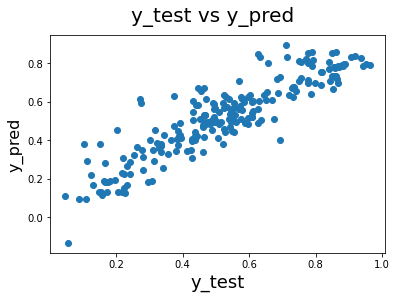

In [77]:
# ploting the graph for actual vs predicted values
# Ploting y_test and y_pred to understand the variance

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [78]:
round(lr_m6.params,4)

const                  0.1909
year                   0.2341
holiday               -0.0963
temp                   0.4777
windspeed             -0.1481
sep                    0.0910
Light_precipitation   -0.2850
Misty                 -0.0787
spring                -0.0554
summer                 0.0621
winter                 0.0945
dtype: float64

The equation of our line will be :

cnt = 0.1909 + (year * 0.2341) + (holiday * -0.0963) + (temp * 0.4777) + (windspeed * -0.1481) + (sep * 0.0910) + (Light_precipitation * -0.2850) + (Misty * -0.0787) + (spring * -0.0554)+ (summer *  0.0621)+ (winter * 0.0945)`

In [80]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


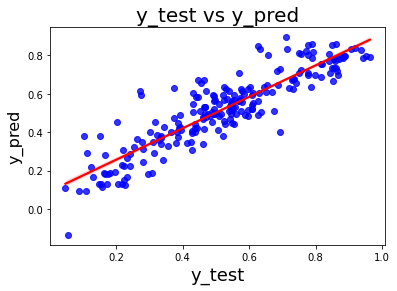

In [81]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.8038
- Train dataset Adjusted R^2 : 0.829    
- Test dataset Adjusted R^2  : 0.7944

Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.